# Decision Tree

## 1-Decision Tree Classifier, First Example

Source: https://www.w3schools.com/python/python_ml_decision_tree.asp

-Task: Given a data set with features (Age, Experience, Rank, nationality), decide if a person should go to a show or not, i.e. Target (Go)


In [3]:
# Import pandas and read the data file
import pandas as pd
df = pd.read_csv("data.csv")
df

,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES
5,44,14,5,UK,NO
6,66,3,7,N,YES
7,35,14,9,UK,YES
8,52,13,7,N,YES
9,35,5,9,N,YES


In [5]:
""" In a decision tree, all values must be numerical, 
 so we change last two non-numerical columns.
 For this we define one dictionary per column: """
d = {'UK':0, 'USA':1, 'N':2}
"map method replaces a dictionary with a column:"
df['Nationality'] = df['Nationality'].map(d)

In [7]:
df

,Age,Experience,Rank,Nationality,Go
0,36,10,9,0,NO
1,42,12,4,1,NO
2,23,4,6,2,NO
3,52,4,4,1,NO
4,43,21,8,1,YES
5,44,14,5,0,NO
6,66,3,7,2,YES
7,35,14,9,0,YES
8,52,13,7,2,YES
9,35,5,9,2,YES


In [9]:
"""Similarly for the last column:"""
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

In [11]:
df

,Age,Experience,Rank,Nationality,Go
0,36,10,9,0,0
1,42,12,4,1,0
2,23,4,6,2,0
3,52,4,4,1,0
4,43,21,8,1,1
5,44,14,5,0,0
6,66,3,7,2,1
7,35,14,9,0,1
8,52,13,7,2,1
9,35,5,9,2,1


In [15]:
# Buil Feature and Targets
features = ['Age', 'Experience', 'Rank', 'Nationality']
X = df[features]
y = df['Go']

print(X)
print(y)

    Age  Experience  Rank  Nationality
0    36          10     9            0
1    42          12     4            1
2    23           4     6            2
3    52           4     4            1
4    43          21     8            1
5    44          14     5            0
6    66           3     7            2
7    35          14     9            0
8    52          13     7            2
9    35           5     9            2
10   24           3     5            1
11   18           3     7            0
12   45           9     9            0
0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: Go, dtype: int64


In [21]:
# Create Decision Tree via sklearn library:
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X, y)

[Text(133.92000000000002, 195.696, 'Rank <= 6.5\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(66.96000000000001, 152.208, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(200.88000000000002, 152.208, 'Nationality <= 0.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(133.92000000000002, 108.72, 'Age <= 35.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(66.96000000000001, 65.232, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(200.88000000000002, 65.232, 'Experience <= 9.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(133.92000000000002, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(267.84000000000003, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

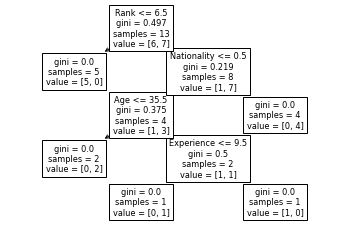

In [22]:
# plot decision tree
import matplotlib.pyplot as plt
tree.plot_tree(dtree, feature_names=features)

## Result Explained:

Rank <= 6.5 means that every comedian with a rank of 6.5 or lower will follow the True arrow (to the left), and the rest will follow the False arrow (to the right).

Gini = 1 - (x/n)^2 - (y/n)^2, where x is the number of positive answers("GO"), n is the number of samples, and y is the number of negative answers ("NO").


samples = number of comedians left at this point in the decision.

value = [6, 7] means that of these 13 comedians, 6 will get a "NO", and 7 will get a "GO".

## Predicting Values

In [23]:
# Should someone w Age=40, experience=10, rank=7 go to the show?
print(dtree.predict([[40, 10, 7, 1]]))

[1]


In [24]:
print(dtree.predict([[40, 10, 6, 1]]))

[0]


## 2-Decision Tree Classifier with Data separated into training and testing

Source:  https://www.datacamp.com/tutorial/decision-tree-classification-python


In [25]:
# Import train_test_split function
from sklearn.model_selection import train_test_split 

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics 

In [26]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [27]:
dtree_model = tree.DecisionTreeClassifier()
dtree_model = dtree_model.fit(X_train,y_train)

In [29]:
y_pred = dtree_model.predict(X_test)

In [32]:
# testing accuracy; the ourput is the percent of accuracy on y_test
accu = metrics.accuracy_score(y_test,y_pred)
print(accu)

0.75


### Visualising

In [34]:
# graphviz converts the decision tree classifier into a dot file
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
# pydotplus converts this dot file to png or displayable form
import pydotplus


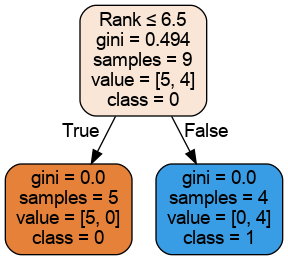

In [35]:
dot_data = StringIO()
export_graphviz(dtree_model, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True,
               feature_names=features,
               class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('test.png')
Image(graph.create_png())

### Optimising Decision Tree

In [41]:
dtree_model = tree.DecisionTreeClassifier(criterion="entropy", 
                                          max_depth=3)
"""
-criterion:
allows attribute selection measure. Possible 
measures: “gini”(default) and “entropy” for the information gain.

-splitter: string, (default=”best”) or Split Strategy. 
Supported strategies are “best” to choose the best split and 
“random” to choose the best random split.

-max_depth : int or None, (default=None) 
The maximum depth of the tree. 
If None, then nodes are expanded until all the leaves contain less 
than min_samples_split samples. The higher value of maximum depth 
causes overfitting, and a lower value causes underfitting.
"""

'\n-criterion:\nallows attribute selection measure. Possible \nmeasures: “gini”(default) and “entropy” for the information gain.\n\n-splitter: string, (default=”best”) or Split Strategy. \nSupported strategies are “best” to choose the best split and \n“random” to choose the best random split.\n\n-max_depth : int or None, (default=None) \nThe maximum depth of the tree. \nIf None, then nodes are expanded until all the leaves contain less \nthan min_samples_split samples. The higher value of maximum depth \ncauses overfitting, and a lower value causes underfitting.\n'

In [42]:
dtree_model.fit(X_train,y_train)
y_pred = dtree_model.predict(X_test)
accu = metrics.accuracy_score(y_test,y_pred)
print("Accuracy", accu)

Accuracy 0.75
